# imprting necessary libraries rquired

In [295]:
import numpy as np 
import pandas as pd 
from pandas.plotting import scatter_matrix

import matplotlib.pyplot as plt 
#% matplotlib notebook
import seaborn as sns

from sklearn import metrics
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Read Data

In [240]:
train_data=pd.read_csv('train.csv')
test_data=pd.read_csv('test.csv')

# Basic Data Analysis or Exploratory Data Analysis

In [241]:
print(train_data.shape)
print(test_data.shape)

(29451, 12)
(68720, 11)


In [242]:
df = pd.concat([train_data, test_data], ignore_index=True)

In [244]:
df.shape

(98171, 12)

In [245]:
df.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


In [271]:
train_data=train_data.drop('ADDRESS',axis=1)
test_data=test_data.drop('ADDRESS',axis=1)

In [247]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98171 entries, 0 to 98170
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              98171 non-null  object 
 1   UNDER_CONSTRUCTION     98171 non-null  int64  
 2   RERA                   98171 non-null  int64  
 3   BHK_NO.                98171 non-null  int64  
 4   BHK_OR_RK              98171 non-null  object 
 5   SQUARE_FT              98171 non-null  float64
 6   READY_TO_MOVE          98171 non-null  int64  
 7   RESALE                 98171 non-null  int64  
 8   LONGITUDE              98171 non-null  float64
 9   LATITUDE               98171 non-null  float64
 10  TARGET(PRICE_IN_LACS)  29451 non-null  float64
dtypes: float64(4), int64(5), object(2)
memory usage: 8.2+ MB


In [248]:
df.isnull().sum()

POSTED_BY                    0
UNDER_CONSTRUCTION           0
RERA                         0
BHK_NO.                      0
BHK_OR_RK                    0
SQUARE_FT                    0
READY_TO_MOVE                0
RESALE                       0
LONGITUDE                    0
LATITUDE                     0
TARGET(PRICE_IN_LACS)    68720
dtype: int64

# data visulization

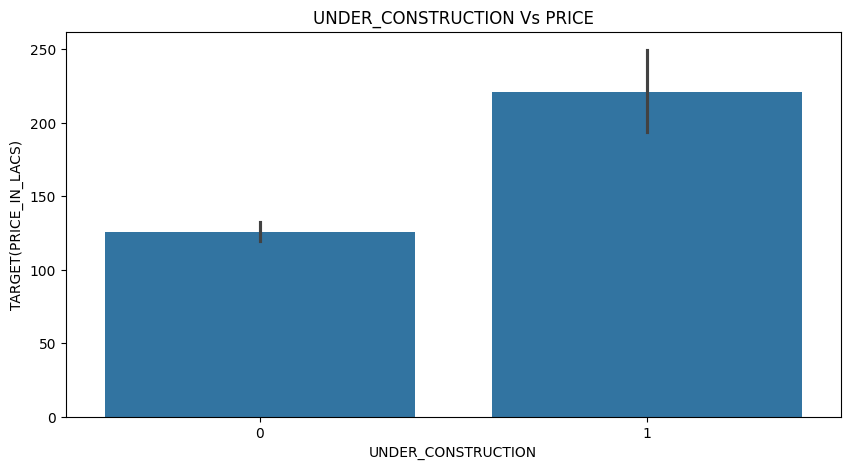

In [254]:
# plotting under_construction vs Price 
plt.figure(figsize=(10,5))
sns.barplot(x = train_data['UNDER_CONSTRUCTION'], y = train_data['TARGET(PRICE_IN_LACS)'])
plt.title('UNDER_CONSTRUCTION Vs PRICE')
plt.show()

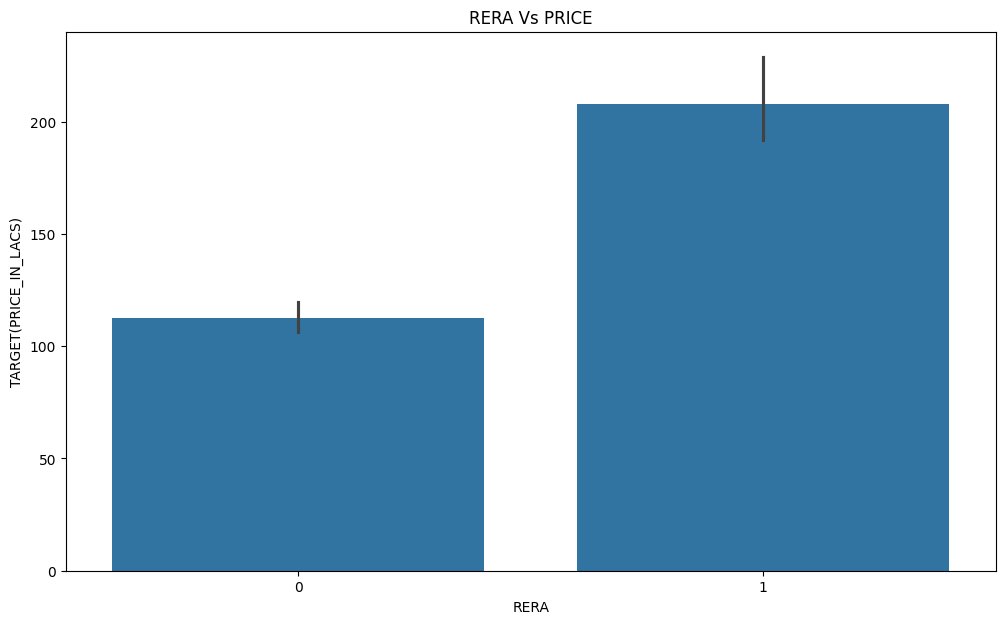

In [ ]:
# plotting RERA vs Price 
plt.figure(figsize=(10,5))
sns.barplot(x = train_data['RERA'], y = train_data['TARGET(PRICE_IN_LACS)'])
plt.title('RERA Vs PRICE')
plt.show()

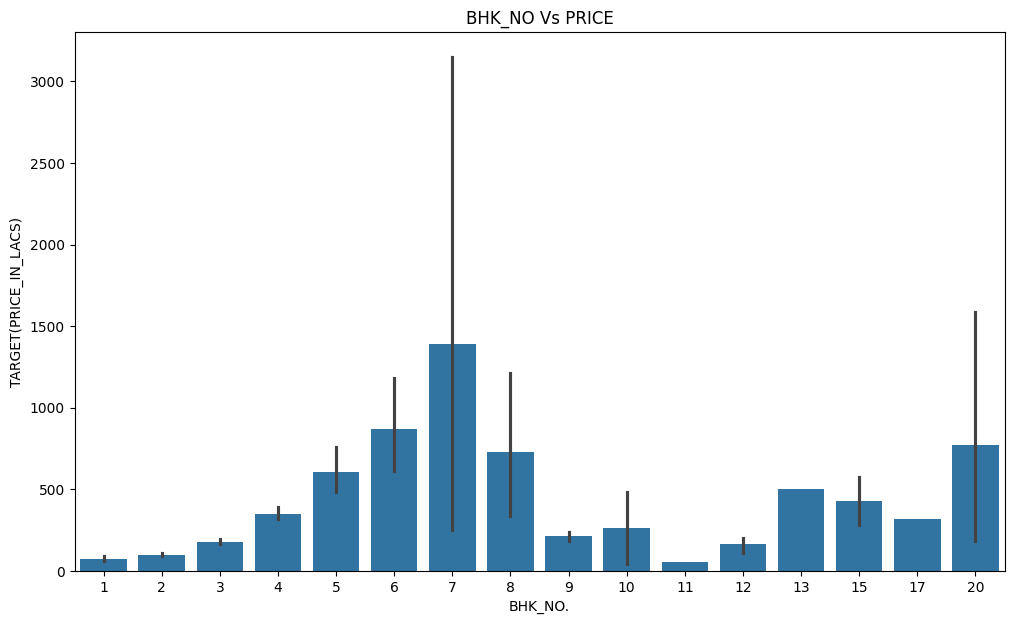

In [255]:
# plotting BHK_NO vs Price 
plt.figure(figsize=(12,7))
sns.barplot(x = train_data['BHK_NO.'], y = train_data['TARGET(PRICE_IN_LACS)'])
plt.title('BHK_NO Vs PRICE')
plt.show()

In [256]:
df.columns

Index(['POSTED_BY', 'UNDER_CONSTRUCTION', 'RERA', 'BHK_NO.', 'BHK_OR_RK',
       'SQUARE_FT', 'READY_TO_MOVE', 'RESALE', 'LONGITUDE', 'LATITUDE',
       'TARGET(PRICE_IN_LACS)'],
      dtype='object')

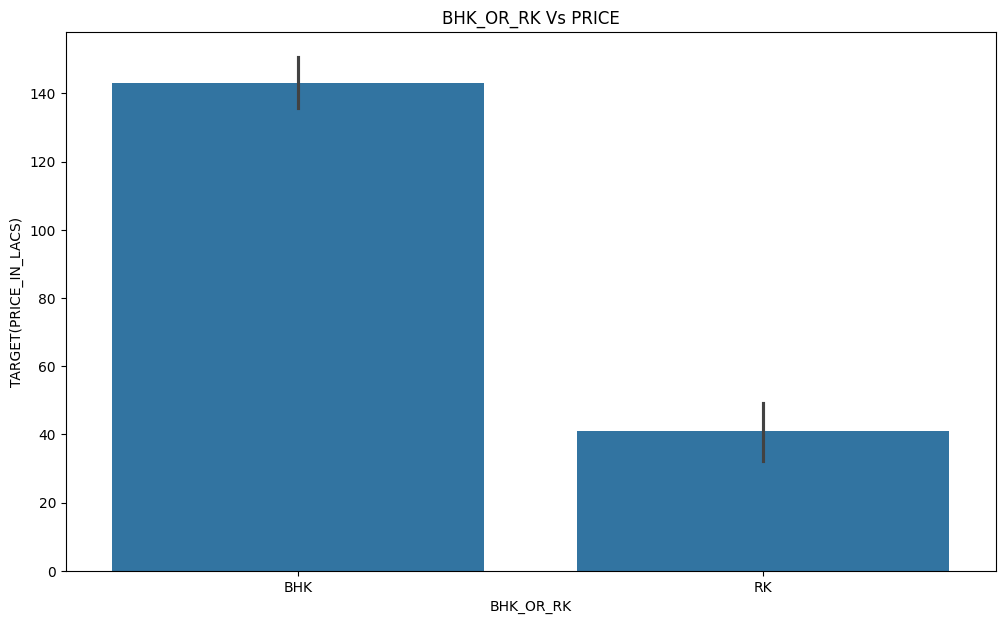

In [257]:
# plotting BHK_OR_RK vs Price 
plt.figure(figsize=(12,7))
sns.barplot(x = train_data['BHK_OR_RK'], y = train_data['TARGET(PRICE_IN_LACS)'])
plt.title('BHK_OR_RK Vs PRICE')
plt.show()

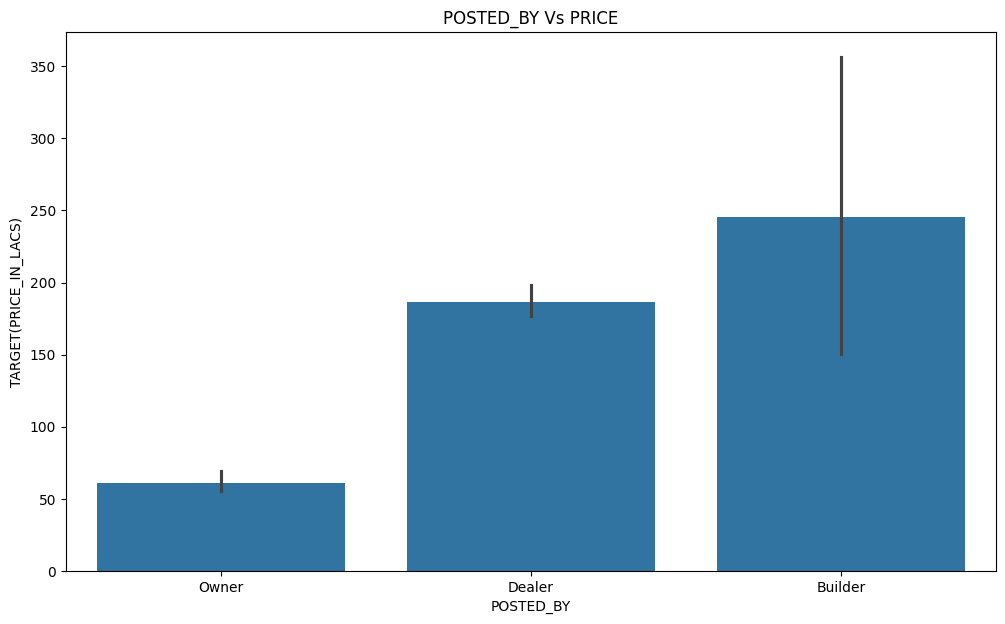

In [258]:
# plotting posted_by vs price
plt.figure(figsize=(12,7))
sns.barplot(x = train_data['POSTED_BY'], y = train_data['TARGET(PRICE_IN_LACS)'])
plt.title('POSTED_BY Vs PRICE')
plt.show()


<Figure size 1200x700 with 0 Axes>

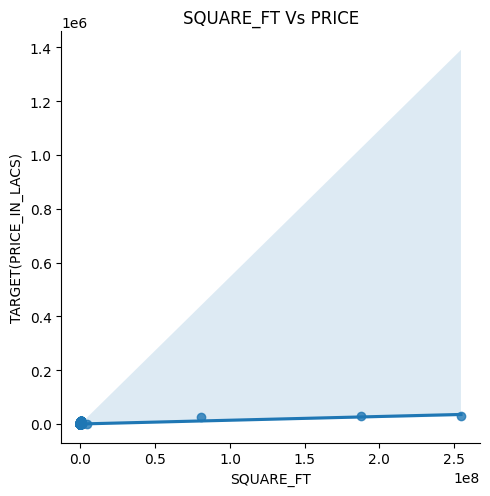

In [259]:
# plotting Square_feet vs price
plt.figure(figsize=(12,7))
sns.lmplot(x = 'SQUARE_FT', y = 'TARGET(PRICE_IN_LACS)', data = train_data)
plt.title('SQUARE_FT Vs PRICE')
plt.show()

if increse in area then price is increasing

<Figure size 1200x700 with 0 Axes>

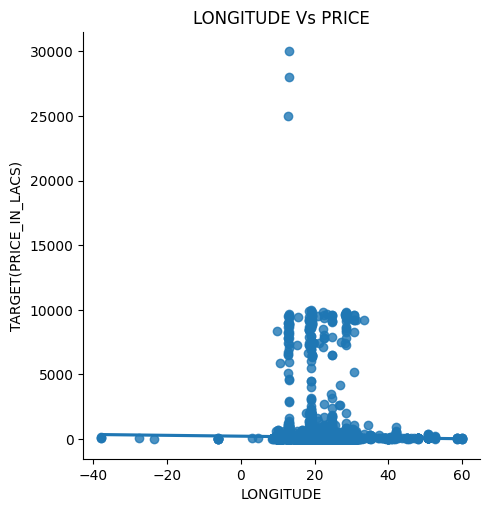

In [260]:
# plotting longitud vs price
plt.figure(figsize=(12,7))
sns.lmplot(x = 'LONGITUDE', y = 'TARGET(PRICE_IN_LACS)', data = train_data)
plt.title('LONGITUDE Vs PRICE')
plt.show()

<Figure size 1200x700 with 0 Axes>

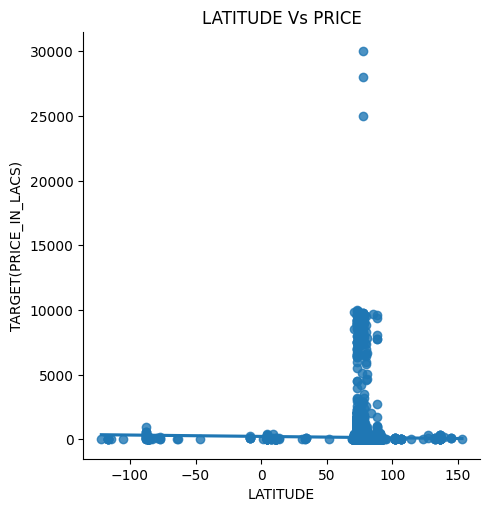

In [261]:
# plotting latitude vs price
plt.figure(figsize=(12,7))
sns.lmplot(x = 'LATITUDE', y = 'TARGET(PRICE_IN_LACS)', data = train_data)
plt.title('LATITUDE Vs PRICE')
plt.show()

In [272]:
# We can drop longitude and latitude as there is no clear correlation between them and the price.
train_data.drop(['LATITUDE','LONGITUDE'], axis=1, inplace=True)
test_data.drop(['LATITUDE','LONGITUDE'], axis=1, inplace=True)


# Converting categorical values into numerical values

In [273]:
# mapping the categorical data to numerical values
train_data['BHK_OR_RK'] = train_data['BHK_OR_RK'].map({'BHK':1, 'RK':1})
train_data['POSTED_BY'] = train_data['POSTED_BY'].map({'Owner':1, 'Dealer':2, 'Builder':3})

test_data['POSTED_BY'] = test_data['POSTED_BY'].map({'Owner':1, 'Dealer':2, 'Builder':3})
test_data['BHK_OR_RK'] = test_data['BHK_OR_RK'].map({'BHK':1, 'RK':1})

In [274]:
train_data.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,TARGET(PRICE_IN_LACS)
0,1,0,0,2,1,1300.236407,1,1,55.0
1,2,0,0,2,1,1275.000000,1,1,51.0
2,1,0,0,2,1,933.159722,1,1,43.0
3,1,0,1,2,1,929.921143,1,1,62.5
4,2,1,0,2,1,999.009247,0,1,60.5


In [278]:
# spliting features and label

Y = train_data['TARGET(PRICE_IN_LACS)']
train_data.drop(['TARGET(PRICE_IN_LACS)'], axis=1, inplace=True)

In [280]:
from sklearn.model_selection import train_test_split

X_train, X_val, Y_train, Y_val = train_test_split(train_data,Y, test_size=0.1, random_state=42)
print('train features shape:', X_train.shape,';','train label shape:', Y_train.shape)
print('validation features shape:', X_val.shape,';','validation label shape:', Y_val.shape)

train features shape: (26505, 8) ; train label shape: (26505,)
validation features shape: (2946, 8) ; validation label shape: (2946,)


# Linear Regression

In [283]:
#importing LinearRegression
from sklearn.linear_model import LinearRegression

# fitting the model
lin_reg = LinearRegression()
print(lin_reg)
lin_reg.fit(X_train, Y_train)

# Evaluvating the score of the model
print("Score on training data:", lin_reg.score(X_train,Y_train))
print("Score on validation data:", lin_reg.score(X_val,Y_val))

LinearRegression()
Score on training data: 0.1422587189434119
Score on validation data: 0.50224346077245


In [287]:
models = dict()

In [288]:
models['lin_reg'] = lin_reg.score(X_val,Y_val)

# Decision tree regression

In [289]:
tree = DecisionTreeRegressor()
print(tree)
tree.fit(X_train, Y_train)

# Evaluvating the score of the model
print("Score on training data:", tree.score(X_train,Y_train))
print("Score on validation data:", tree.score(X_val,Y_val))

DecisionTreeRegressor()
Score on training data: 0.9958766387740389
Score on validation data: 0.6952973251269888


In [290]:
models['tree'] = tree.score(X_val,Y_val)

# Random forest Regression

In [293]:
forest = RandomForestRegressor(n_estimators=100)
print(forest)
forest.fit(X_train, Y_train)

# Evaluvating the score of the model
print("Score on training data:", forest.score(X_train,Y_train))
print("Score on validation data:", forest.score(X_val,Y_val))

RandomForestRegressor()
Score on training data: 0.9781035339416978
Score on validation data: 0.6773102550545487


In [294]:
models['forest'] = forest.score(X_val,Y_val)

# GradientBoostingRegressor

In [296]:
boosting = GradientBoostingRegressor(n_estimators=2000, max_depth=5, learning_rate=0.1)
print(boosting)
boosting.fit(X_train, Y_train)

# Evaluvating the score of the model
print("Score on training data:", boosting.score(X_train,Y_train))
print("Score on validation data:", boosting.score(X_val,Y_val))

GradientBoostingRegressor(max_depth=5, n_estimators=2000)
Score on training data: 0.9915112859209289
Score on validation data: 0.6935851364111837


In [297]:
models['boosting'] = boosting.score(X_val,Y_val)

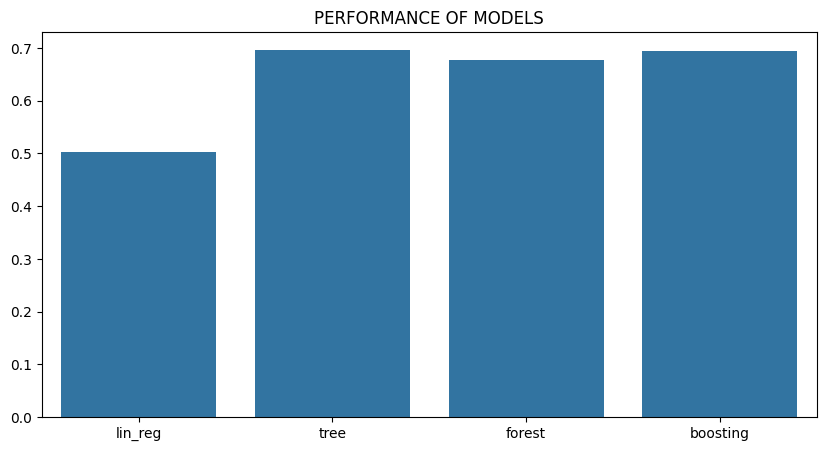

In [299]:
# plotting the performance of models
plt.figure(figsize=(10,5))
keys = list(models.keys())
values = list(models.values())
sns.barplot(x = keys, y = values)
plt.title('PERFORMANCE OF MODELS')
plt.show()

In [ ]:
# fitting boosting to the whole training dataset
boosting.fit(train_data, Y)

#prediction on testing dataset
Y_pred = boosting.predict(test_data)

In [ ]:
tree.fit(train_data, Y)
#prediction on testing dataset
Y_pred = tree.predict(test_data)

In [307]:
df.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,TARGET(PRICE_IN_LACS)
0,1,0,0,2,1,1300.236407,1,1,55.0
1,2,0,0,2,1,1275.000000,1,1,51.0
2,1,0,0,2,1,933.159722,1,1,43.0
3,1,0,1,2,1,929.921143,1,1,62.5
4,2,1,0,2,1,999.009247,0,1,60.5


In [304]:
import pickle
filename='saved_model1.sav'
pickle.dump(tree,open(filename,'wb'))

In [305]:
load_model=pickle.load(open(filename,'rb'))

In [309]:
load_model.predict([[1,0,0,2,1,933.236407,1,1]])

C:\Users\UJWAL JV\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([43.])